In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load dataset 

In [2]:
x_train= np.loadtxt('input.csv', delimiter= ',')
y_train= np.loadtxt('labels.csv', delimiter=',')

x_test= np.loadtxt('input_test.csv', delimiter=',')
y_test= np.loadtxt('labels_test.csv', delimiter=',')

In [3]:
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)        
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

# Note- every single image is of the size 100*100 pixels; and 3 is the rgb channels thats why we have 30000(100*100*3) for each

shape of x_train:  (2000, 30000)
shape of x_test:  (400, 30000)
shape of y_train:  (2000,)
shape of y_test:  (400,)


In [4]:
# we need to reshape the data into approriate image sizes
x_train= x_train.reshape(len(x_train), 100, 100, 3)
y_train= y_train.reshape(len(y_train), 1)

x_test= x_test.reshape(len(x_test), 100, 100, 3)
y_test= y_test.reshape(len(y_test), 1)

# check the shape after reshaping
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)        
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (2000, 100, 100, 3)
shape of x_test:  (400, 100, 100, 3)
shape of y_train:  (2000, 1)
shape of y_test:  (400, 1)


In [5]:
#  if we print any single image data the value will range from 0-255 thats noting but typical rgb values
#  so to train our model appropriately we need to rescale the valyes between 0-1 and for that we need to divde the values by 255

x_train[1,:]


array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [6]:
#  so lets lets scale the data (jus like stadard scaler method; how we scale data to bring it one range)
x_train= x_train/255.0
x_test= x_test/255.0

# now lets check the range
x_train[1,:]            # here we now have normalized data in the range of 0-1

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [7]:
import matplotlib.pyplot as plt
import random



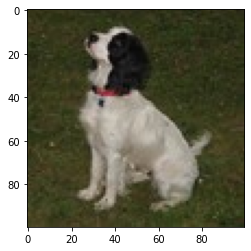

In [15]:
# ranval= random.randint(0, len(x_train))
idx= random.randint(0,len(x_train))         #this random.randint will randomly pick the images whenever u run it
plt.imshow(x_train[idx, :])
plt.show()

# now lets go for model using keras

In [9]:
# Lets make the model architecture

model= Sequential()

# first parameter of conv layer are the no. of filters we want to use (here it is 32), 
# 2nd is the size of the filter we want to use(3,3),
# mention activation function we want to use(relu),
# input shape is; what kind of shape our model is expecting (here it is 100,100,3)

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape= (100, 100, 3)))
model.add(MaxPooling2D((2,2)))                 # 2,2 is the size of MaxPooling, we can also mention stride here but if not mentioned then ot takes default stride ie 1

model.add(Conv2D(32, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))
          
model.add(Flatten())

model.add(Dense(64, activation= 'relu')) 
model.add(Dense(1, activation= 'sigmoid'))    

# last layer will have Dense 1 coz its binary and have to predict one option from either of two
# and also sigmoid as activation function coz its binary classification
          

In [10]:
# We have to now compile the model. Here we add our cost funtion and back propogation
# it takes teh parameters loss, optimizer and metrics 

model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics= ['accuracy'] )

# binary_crossentropy loss coz its binary classification 
# metircs indicate on which we want to evaluate our model
# Usualy adam optimizer is used coz it takes teh standard hyperparameters and here we dont have to mention/tune the learning rate

# Now since our keras model is ready we will go and train the model with our train data

In [11]:
model.fit(x_train, y_train, epochs= 10, batch_size=64)    

# Note- if u again renumber the epoch and run this same cell then it will resume the run from last epoch run

Epoch 1/10
32/32 [==============================] - 12s 343ms/step - loss: 0.7201 - accuracy: 0.5115
Epoch 2/10
32/32 [==============================] - 10s 317ms/step - loss: 0.6771 - accuracy: 0.5500
Epoch 3/10
32/32 [==============================] - 9s 284ms/step - loss: 0.6311 - accuracy: 0.6555
Epoch 4/10
32/32 [==============================] - 9s 282ms/step - loss: 0.5654 - accuracy: 0.7165
Epoch 5/10
32/32 [==============================] - 10s 298ms/step - loss: 0.5180 - accuracy: 0.7475
Epoch 6/10
32/32 [==============================] - 9s 286ms/step - loss: 0.4655 - accuracy: 0.7890
Epoch 7/10
32/32 [==============================] - 9s 288ms/step - loss: 0.4190 - accuracy: 0.8140
Epoch 8/10
32/32 [==============================] - 9s 293ms/step - loss: 0.3552 - accuracy: 0.8470
Epoch 9/10
32/32 [==============================] - 9s 286ms/step - loss: 0.3120 - accuracy: 0.8620
Epoch 10/10
32/32 [==============================] - 9s 286ms/step - loss: 0.2760 - accuracy: 0.8

In [12]:
#  checking the test accuracy
model.evaluate(x_test, y_test)      # we dont get good accuracy for test data coz we have less data to test 

13/13 [==============================] - 1s 32ms/step - loss: 0.6509 - accuracy: 0.7050


[0.6508746147155762, 0.7049999833106995]

# MAking predictions 

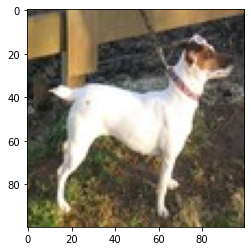

1/1 [==============================] - 0s 75ms/step
Our model says its a:  dog


In [13]:
rand_img= random.randint(0, len(y_test))
plt.imshow(x_test[rand_img, :])
plt.show()

y_pred= model.predict(x_test[rand_img,:].reshape(1, 100, 100, 3)) 
y_pred= y_pred > 0.5 

if (y_pred == 0):
    pred = 'dog'
else:
    pred= 'cat'
    
print("Our model says its a: ", pred)
